In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from functools import reduce
from sklearn.preprocessing import normalize

In [2]:
## Returns True if the arrays representing the two partitions are adjacent by a swap and false otherwise
def is_adjacent(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    if num_diff_1 != 2 and num_diff_2 != 2:
        return False
    else:
        swaps = sum(diff_part1[0] ^ diff_part2[0])
        return swaps == 2 or swaps == (dist_size*2 - 2)   

In [3]:
def adjacent_nodes(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [17]:
def plot_partition(part, dim=None, **kwargs):
    if not dim:
        dim = int(np.sqrt(part.shape[0]))
        dim = (dim, dim)
    plan = part.reshape(dim)
    return plt.imshow(plan, **kwargs)

## 3x3 -> 3

In [60]:
with open("enums/enum_[3,3]_[3]_3_rc.txt") as file:
    nodes={}
    for i, line in enumerate(file):
        nodes[i] = np.fromstring(line, dtype=int, sep=',').reshape(3,3)
    

In [61]:
nodes

{0: array([[1, 2, 2],
        [1, 2, 3],
        [1, 3, 3]]), 1: array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), 2: array([[1, 2, 2],
        [1, 3, 2],
        [1, 3, 3]]), 3: array([[1, 2, 2],
        [1, 1, 2],
        [3, 3, 3]]), 4: array([[1, 1, 2],
        [1, 2, 2],
        [3, 3, 3]]), 5: array([[1, 1, 2],
        [1, 3, 2],
        [3, 3, 2]]), 6: array([[1, 1, 1],
        [2, 3, 3],
        [2, 2, 3]]), 7: array([[1, 1, 1],
        [2, 2, 3],
        [2, 3, 3]]), 8: array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]), 9: array([[1, 1, 2],
        [3, 1, 2],
        [3, 3, 2]])}

In [104]:
adjacent_nodes(nodes)

[(0, 1),
 (0, 2),
 (0, 7),
 (1, 2),
 (1, 5),
 (1, 9),
 (2, 3),
 (3, 4),
 (3, 8),
 (4, 5),
 (4, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8)]

In [48]:
graph = nx.Graph()
graph.add_edges_from(adjacent_nodes(nodes))

In [115]:
len(graph.edges)

16

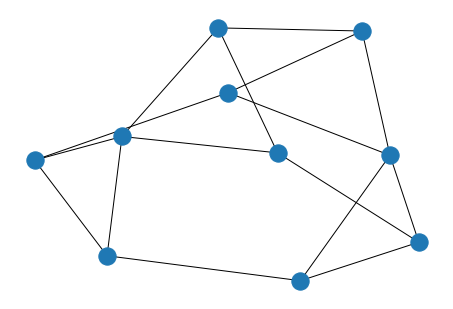

In [51]:
nx.draw(graph)

In [49]:
degrees = list(map(lambda n: nx.degree(graph,n), graph.nodes()))

In [50]:
print("Max Degree:", max(degrees))
print("Mim Degree:", min(degrees))

Max Degree: 4
Mim Degree: 3


In [91]:
nx.radius(graph)

3

In [92]:
nx.diameter(graph)

3

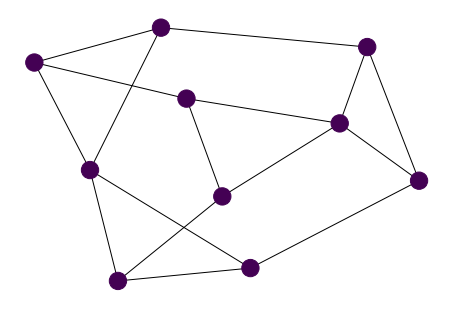

In [53]:
nx.draw(graph,
        node_color=[n in nx.center(graph) for n in graph.nodes()])

### 4x4 -> 4

In [36]:
with open("enums/enum_[4,4]_[4]_4_rc.txt") as file:
    nodes_4_4={}
    for i, line in enumerate(file):
        nodes_4_4[i] = np.fromstring(line, dtype=int, sep=',')   

In [37]:
edges_4_4 = adjacent_nodes(nodes_4_4)

In [38]:
graph_4_4 = nx.Graph()
graph_4_4.add_edges_from(edges_4_4)

In [39]:
len(graph_4_4.edges)

260

In [40]:
degrees_4_4 = list(map(lambda n: nx.degree(graph_4_4,n), graph_4_4.nodes()))

In [41]:
print("Max Degree:", max(degrees_4_4))
print("Min Degree:", min(degrees_4_4))

Max Degree: 8
Min Degree: 3


In [42]:
nx.radius(graph_4_4)

6

In [43]:
nx.diameter(graph_4_4)

8

In [44]:
len(nx.center(graph_4_4))

36

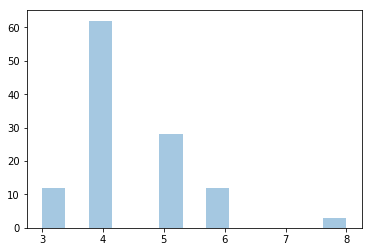

In [45]:
sns.distplot(degrees_4_4, kde=False)

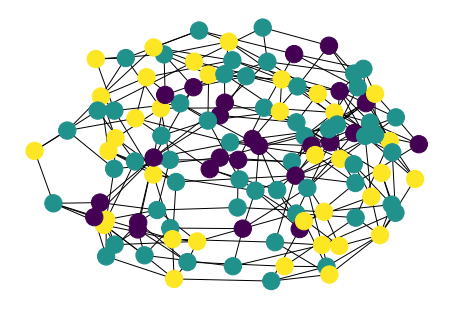

In [130]:
one_away = reduce(lambda s, n: s | set(nx.neighbors(graph_4_4,n)),center_4_4, set())
one_away = one_away - set(center_4_4)
center_4_4 = nx.center(graph_4_4)
nx.draw(graph_4_4,
        node_color=[0.5 if n in one_away else n in center_4_4 for n in graph_4_4.nodes()])

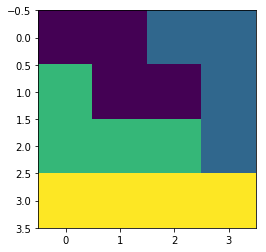

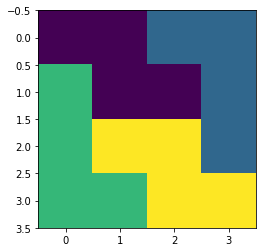

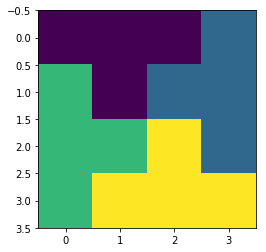

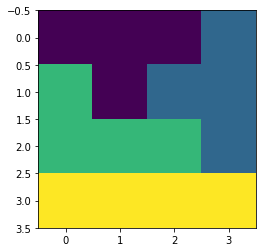

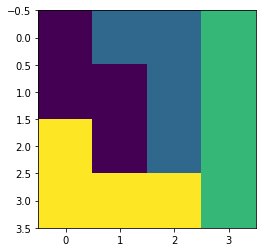

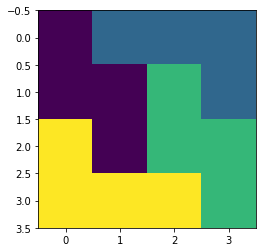

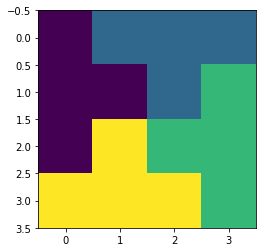

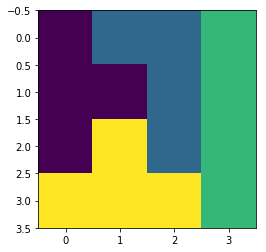

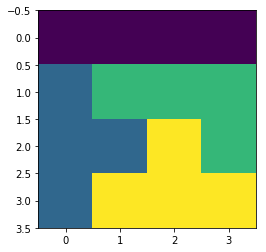

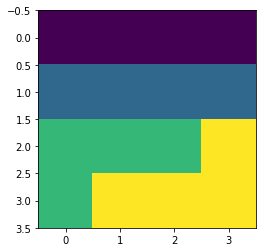

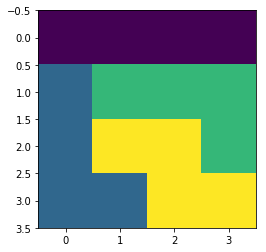

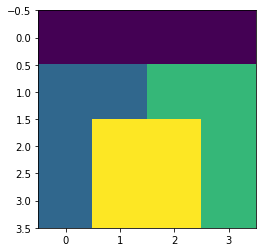

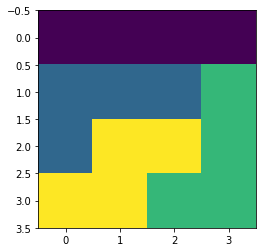

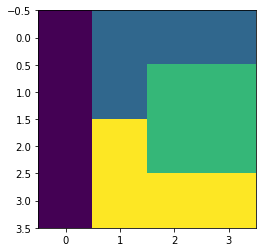

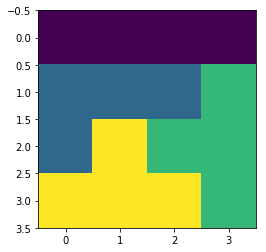

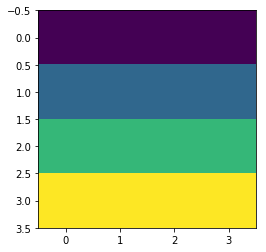

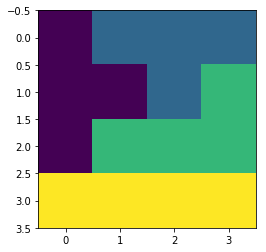

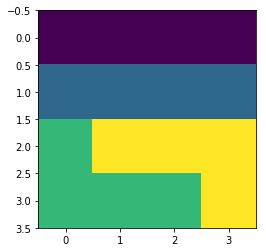

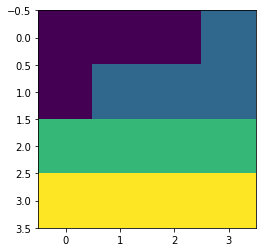

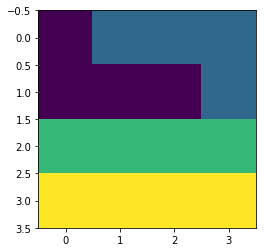

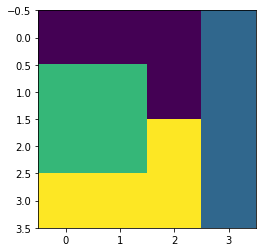

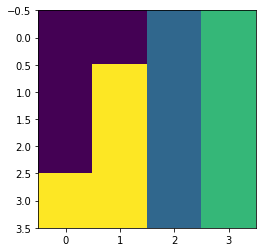

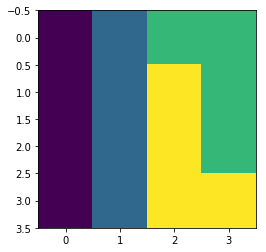

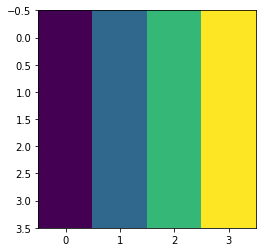

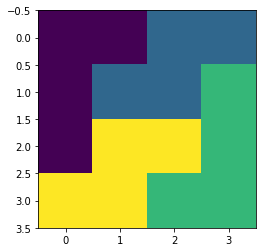

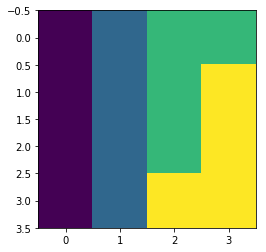

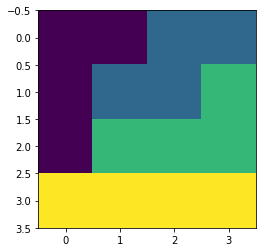

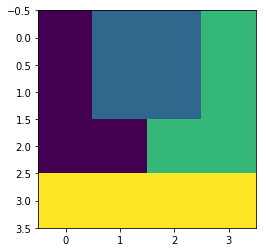

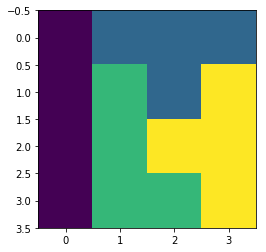

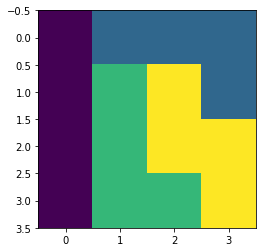

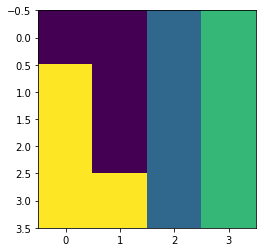

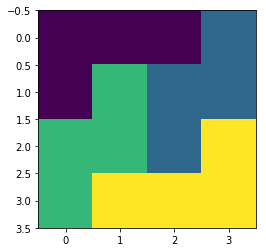

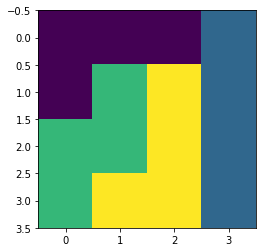

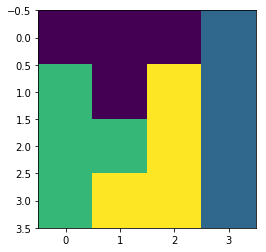

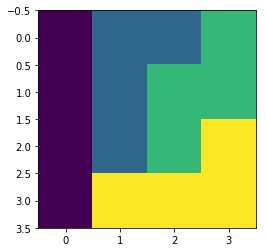

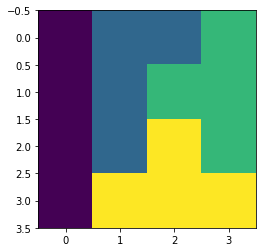

In [120]:
for node in center_4_4:
    plot_partition(nodes_4_4[node])
    plt.show()

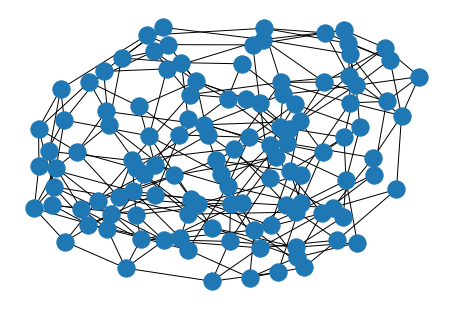

In [107]:
nx.draw(graph_4_4)

## 4x4 ->2

In [3]:
with open("enums/enum_[4,4]_[8]_2_rc.txt") as file:
    nodes_4_4_2={}
    for i, line in enumerate(file):
        nodes_4_4_2[i] = np.fromstring(line, dtype=int, sep=',')

In [7]:
edges_4_4_2 = adjacent_nodes(nodes_4_4_2)
graph_4_4_2 = nx.Graph()
graph_4_4_2.add_edges_from(edges_4_4_2)

In [8]:
print("# edges:", len(edges_4_4_2))
print("# nodes:", len(graph_4_4_2.nodes))

# edges: 328
# nodes: 70


In [9]:
degrees_4_4_2 = list(map(lambda n: nx.degree(graph_4_4_2,n), graph_4_4_2.nodes()))
print("Max Degree:", max(degrees_4_4_2))
print("Min Degree:", min(degrees_4_4_2))

Max Degree: 12
Min Degree: 7


In [10]:
print("Radius:", nx.radius(graph_4_4_2))
print("Diameter:", nx.diameter(graph_4_4_2))
print("#Centers:", len(nx.center(graph_4_4_2)))

Radius: 4
Diameter: 5
#Centers: 62


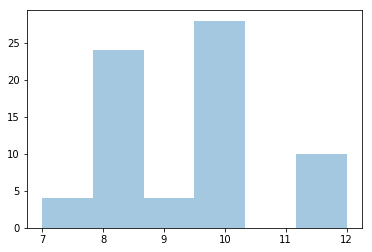

In [11]:
sns.distplot(degrees_4_4_2, kde=False)

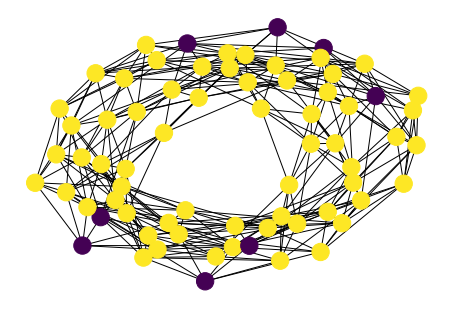

In [34]:
center_4_4_2 = nx.center(graph_4_4_2)
nx.draw(graph_4_4_2,
        node_color=[n in center_4_4_2 for n in graph_4_4_2.nodes()])

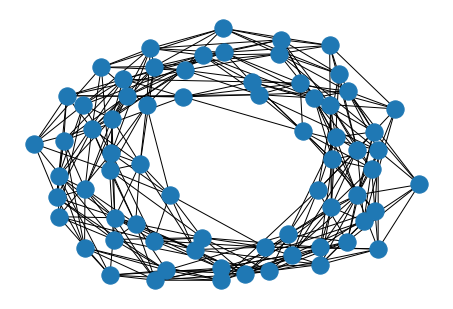

In [12]:
nx.draw(graph_4_4_2)

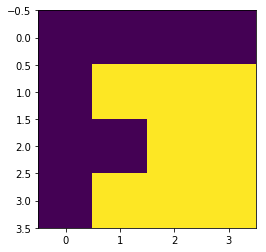

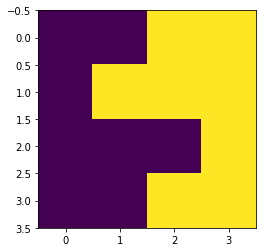

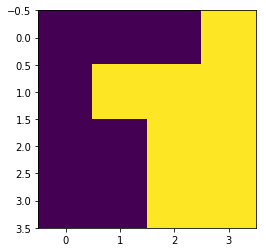

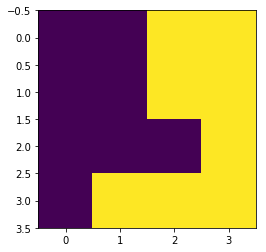

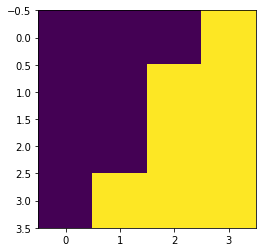

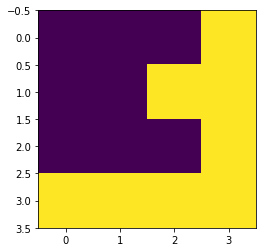

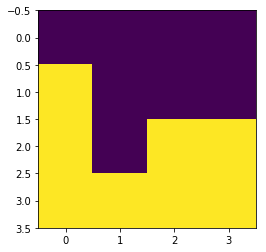

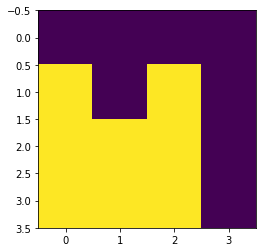

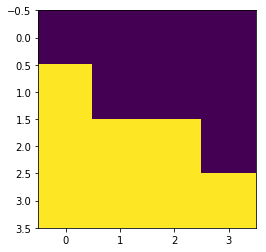

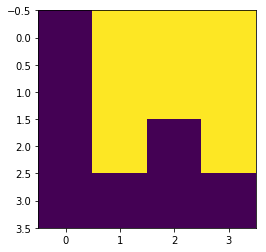

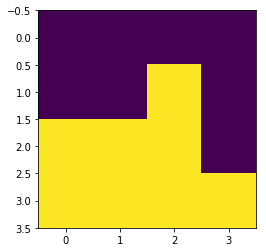

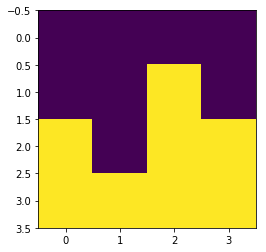

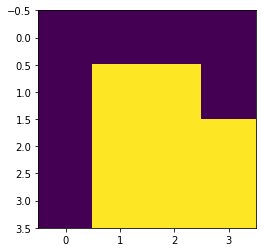

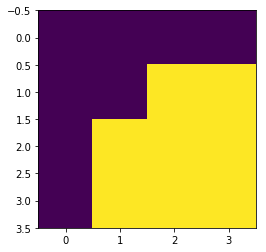

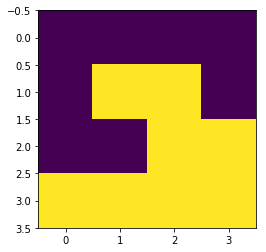

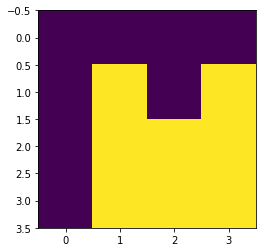

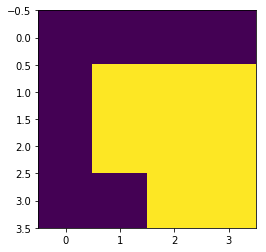

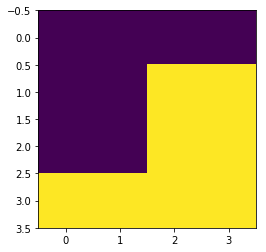

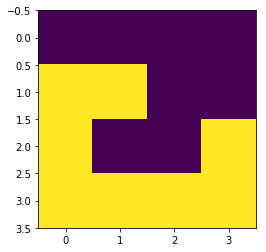

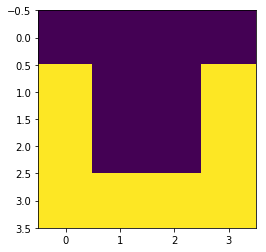

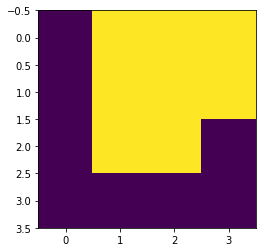

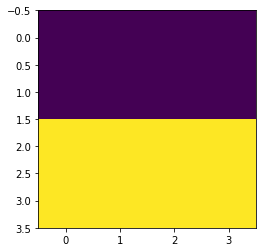

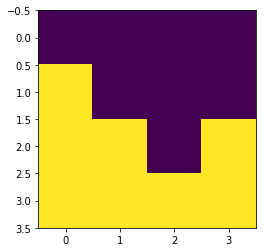

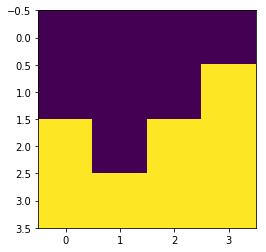

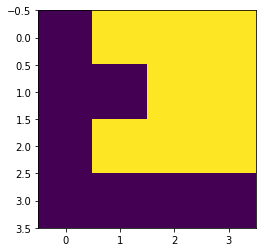

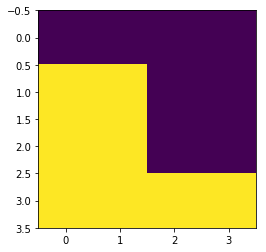

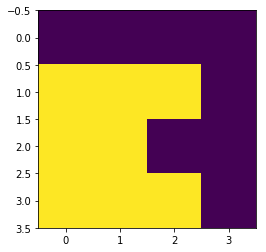

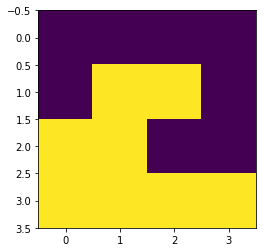

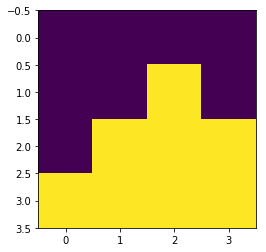

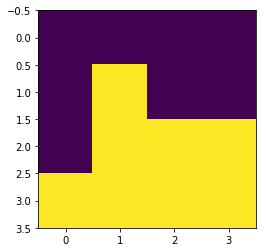

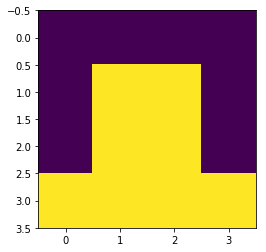

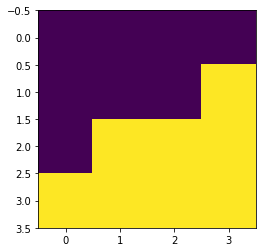

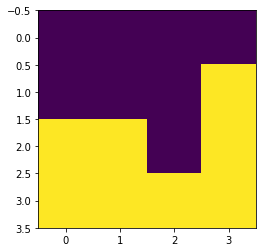

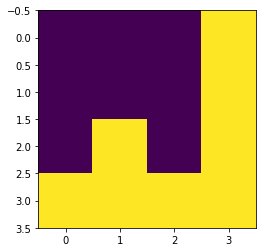

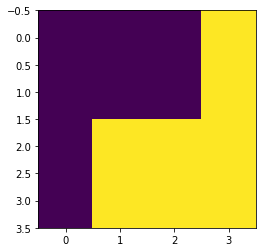

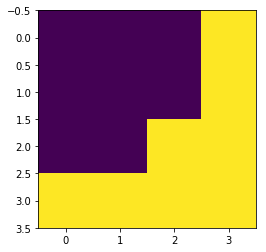

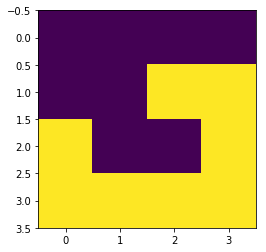

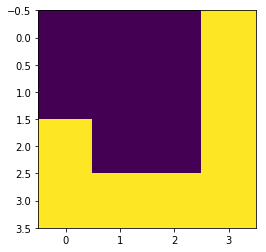

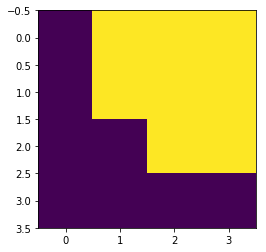

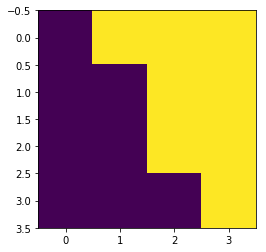

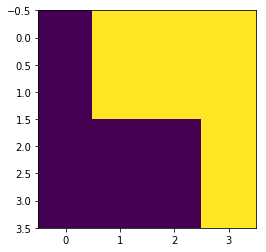

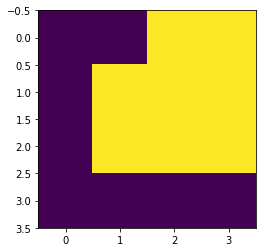

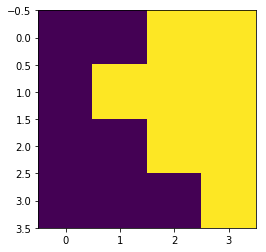

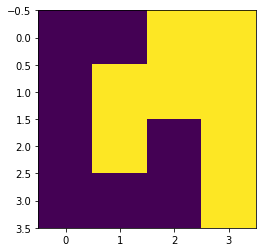

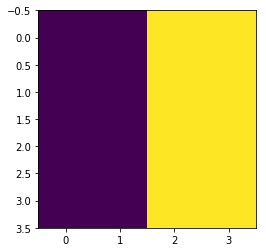

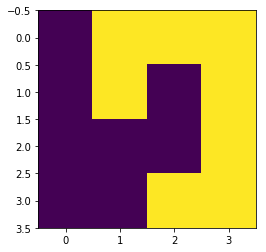

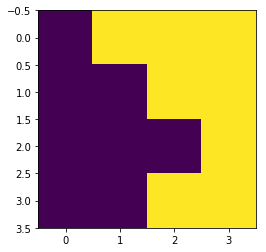

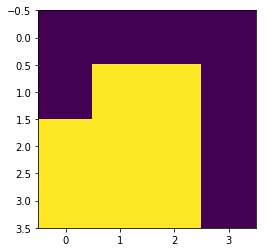

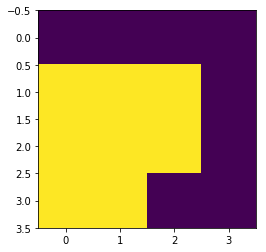

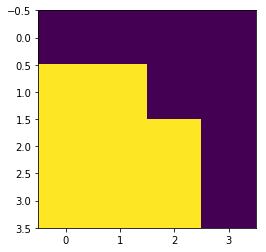

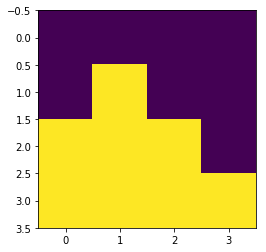

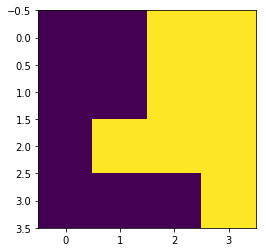

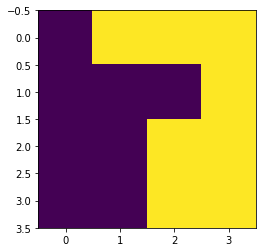

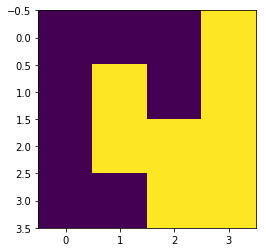

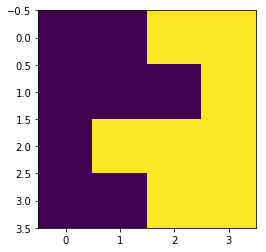

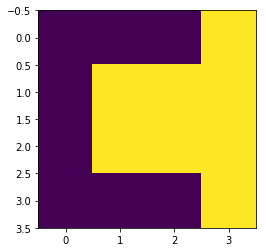

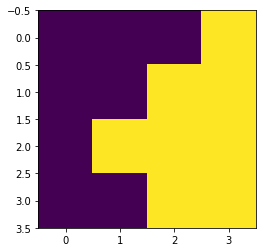

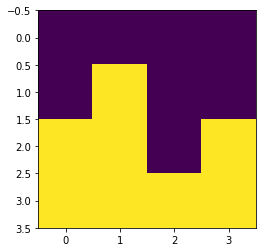

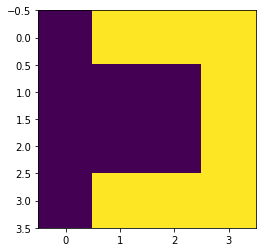

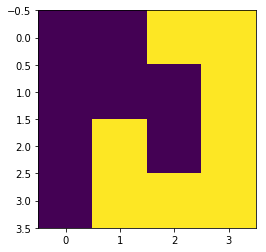

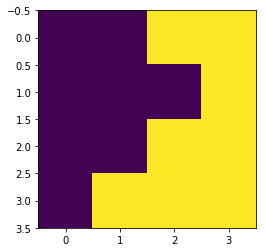

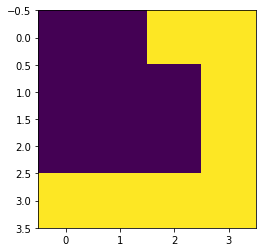

In [119]:
for node in center_4_4_2:
    plot_partition(nodes_4_4_2[node])
    plt.show()

### 4x4->8

In [64]:
with open("enums/enum_[4,4]_[2]_8_rc.txt") as file:
    nodes_4_4_8={}
    for i, line in enumerate(file):
        nodes_4_4_8[i] = np.fromstring(line, dtype=int, sep=',')

In [65]:
edges_4_4_8 = adjacent_nodes(nodes_4_4_8)
graph_4_4_8 = nx.Graph()
graph_4_4_8.add_edges_from(edges_4_4_8)

In [7]:
print("# edges:", len(edges_4_4_8))
print("# nodes:", len(graph_4_4_8.nodes))

# edges: 70
# nodes: 36


In [8]:
degrees_4_4_8 = list(map(lambda n: nx.degree(graph_4_4_8,n), graph_4_4_8.nodes()))
print("Max Degree:", max(degrees_4_4_8))
print("Min Degree:", min(degrees_4_4_8))

Max Degree: 6
Min Degree: 1


In [9]:
print("Radius:", nx.radius(graph_4_4_8))
print("Diameter:", nx.diameter(graph_4_4_8))
print("#Centers:", len(nx.center(graph_4_4_8)))

Radius: 5
Diameter: 10
#Centers: 6


In [35]:
pi_4_4_8 = normalize(np.array([degrees_4_4_8]), norm="l1")

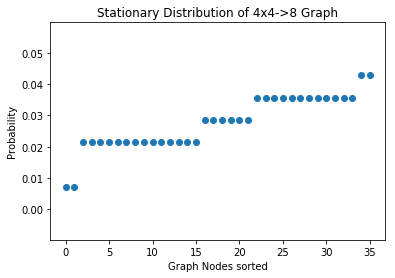

In [59]:
num_edges = len(edges_4_4_8)
plt.title("Stationary Distribution of 4x4->8 Graph")
plt.xlabel("Graph Nodes sorted")
plt.ylabel("Probability")
plt.scatter(y=sorted(pi_4_4_8.flatten()), x=sorted(graph_4_4_8.nodes()))
plt.show()

In [52]:
graph_4_4_8.nodes

NodeView((0, 1, 2, 5, 9, 24, 3, 6, 10, 25, 11, 26, 4, 12, 27, 13, 28, 16, 17, 7, 8, 15, 29, 30, 31, 32, 33, 34, 35, 14, 18, 19, 20, 21, 22, 23))

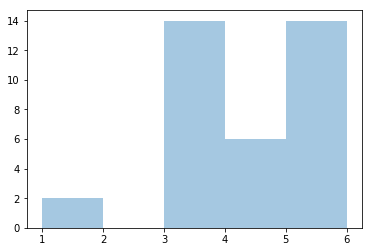

In [10]:
sns.distplot(degrees_4_4_8, kde=False)

In [11]:
center_4_4_8 = nx.center(graph_4_4_8)

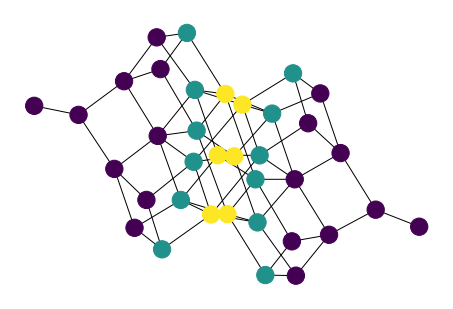

In [14]:
one_away = reduce(lambda s, n: s | set(nx.neighbors(graph_4_4_8,n)), 
                  center_4_4_8, set())
one_away = one_away - set(center_4_4_8)
center_4_4 = nx.center(graph_4_4_8)
nx.draw(graph_4_4_8,
        node_color=[0.5 if n in one_away else n in center_4_4_8 for n in graph_4_4_8.nodes()])

In [159]:
# %matplotlib notebook
# n_colors = [0.5 if n in one_away else n in center_4_4_8 for n in graph_4_4_8.nodes()]
# n_colors = list(map(float, n_colors))
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_title('4x4->8 Graph')
# linefig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_title('click on point to plot time series')
# nx.draw(graph_4_4_8, ax=ax, node_color=n_colors, picker=5)


# def onpick(event):

#     if event.artist!=line: return True

#     N = len(event.ind)
#     if not N: return True


#     figi = plt.figure()
#     for subplotnum, dataind in enumerate(event.ind):
#         ax = figi.add_subplot(N,1,subplotnum+1)
#         plot_partition(nodes_4_4_8[dataind], ax=ax)
#         ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
#                 transform=ax.transAxes, va='top')
#         ax.set_ylim(-0.5, 1.5)
#     figi.show()
#     return True

# fig.canvas.mpl_connect('pick_event', onpick)

# plt.show()

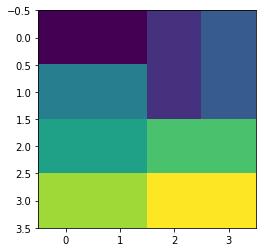

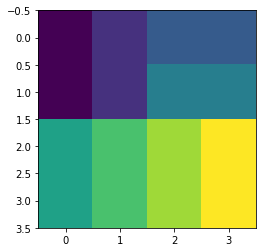

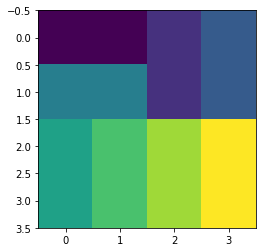

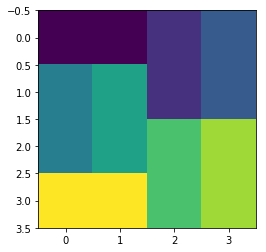

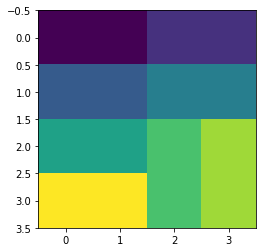

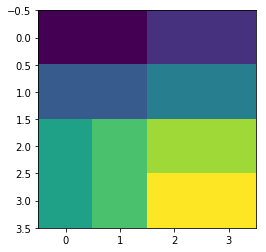

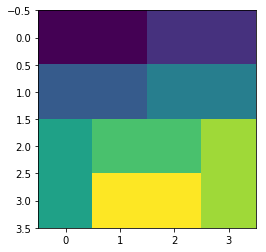

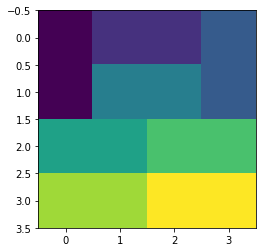

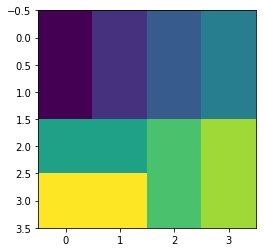

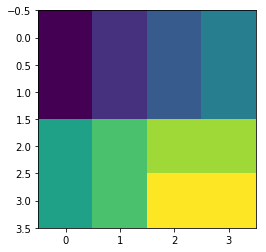

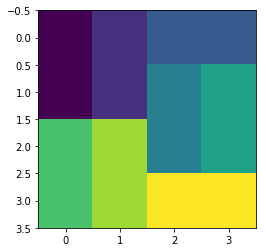

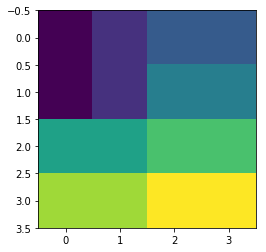

In [20]:
for node in one_away:
    plot_partition(nodes_4_4_8[node])
    plt.show()

In [94]:
nx.to_dict_of_lists(graph)

{0: [1, 2, 7],
 1: [0, 2, 5, 9],
 2: [0, 1, 3],
 7: [0, 6, 8],
 5: [1, 4, 9],
 9: [1, 5, 6],
 3: [2, 4, 8],
 4: [3, 5, 8],
 8: [3, 4, 6, 7],
 6: [7, 8, 9]}

In [122]:
set(nx.neighbors(graph,0))

{1, 2, 7}

In [116]:
g = []
for node in graph.nodes():
    d = {"node": node, "neighbors": list(nx.neighbors(graph,node)),
         "partition": str(nodes[node])}
    g.append(d)

In [117]:
g

[{'node': 0, 'neighbors': [1, 2, 7], 'partition': '[1 2 2 1 2 3 1 3 3]'},
 {'node': 1, 'neighbors': [0, 2, 5, 9], 'partition': '[1 2 3 1 2 3 1 2 3]'},
 {'node': 2, 'neighbors': [0, 1, 3], 'partition': '[1 2 2 1 3 2 1 3 3]'},
 {'node': 7, 'neighbors': [0, 6, 8], 'partition': '[1 1 1 2 2 3 2 3 3]'},
 {'node': 5, 'neighbors': [1, 4, 9], 'partition': '[1 1 2 1 3 2 3 3 2]'},
 {'node': 9, 'neighbors': [1, 5, 6], 'partition': '[1 1 2 3 1 2 3 3 2]'},
 {'node': 3, 'neighbors': [2, 4, 8], 'partition': '[1 2 2 1 1 2 3 3 3]'},
 {'node': 4, 'neighbors': [3, 5, 8], 'partition': '[1 1 2 1 2 2 3 3 3]'},
 {'node': 8, 'neighbors': [3, 4, 6, 7], 'partition': '[1 1 1 2 2 2 3 3 3]'},
 {'node': 6, 'neighbors': [7, 8, 9], 'partition': '[1 1 1 2 3 3 2 2 3]'}]

In [118]:
with open('3_3_graph.json', 'w') as outfile:
    json.dump(g, outfile)

### 5x5->5

In [20]:
with open("enums/enum_[5,5]_[5]_5_rc.txt") as file:
    nodes_5_5={}
    for i, line in enumerate(file):
        nodes_5_5[i] = np.fromstring(line, dtype=int, sep=',')

In [21]:
edges_5_5 = adjacent_nodes(nodes_5_5)
graph_5_5 = nx.Graph()
graph_5_5.add_edges_from(edges_5_5)

KeyboardInterrupt: 

In [ ]:
print("# edges:", len(edges_5_5))
print("# nodes:", len(graph_5_5.nodes))